Introduction
==

This project was derived from Github : Advanced Housing Regression.

A really good project to work on, for a very practical problem. 

Let's get started!

In [270]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 85)

import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [271]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
full_data = [df_train, df_test]

In [272]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [273]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are a staggering 81 features present in this dataset!

**Exploratory Data Analysis:**
==

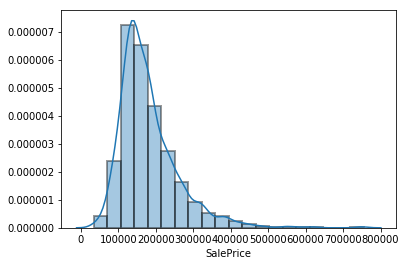

In [274]:
sns.distplot(df_train['SalePrice'], bins = 20, hist_kws=dict(edgecolor="k", linewidth=2))

It seems that our dependent variable has a skewed distribution and not an approximately normal distribution. We will need to transform our dependent variable to increase accuracy of prediction.

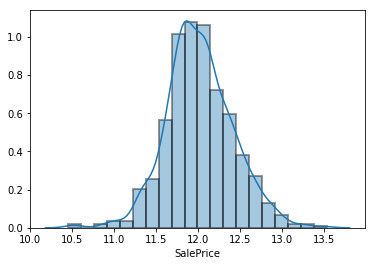

In [275]:
sns.distplot(np.log(df_train['SalePrice']), bins = 20, hist_kws=dict(edgecolor="k", linewidth=2))

log(SalePrice) is a more regular distribution with less skewness. We can use log(SalePrice as our dependent variable)

In [276]:
df_train['LSalePrice'] = np.log(df_train['SalePrice'])

In [277]:
import statsmodels.api as sm

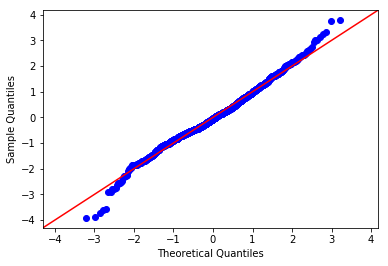

In [278]:
fig = sm.qqplot(df_train['LSalePrice'],fit=True, line='45')

QQline represents a normal distribution. The scatterpoints align closely with the QQline, except for the tails. We can conclude that log(SalePrice) is approximately normally distributed

Detection of Outliers:

In [279]:
from scipy import stats
m = stats.trim_mean(df_train['LSalePrice'], 0.1)
print("With 10% clipped on both sides, trimmed mean: {}".format(m))
print("Sample mean: {}".format(np.mean(df_train['LSalePrice'])))

With 10% clipped on both sides, trimmed mean: 12.017108133015405
Sample mean: 12.024050901109373


Trimmed mean is close to sample mean, this suggests there are no extreme outliers

Finding out the data type of each column:

In [280]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Information is not useful for finding out if column represents continous/categorical/ordinal variable. In this case, the only ways are to manually explore each column and read data description.

From description of data (data_description.txt),

__categorical variables__: <br />
  [ 'MSSubClass' , 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
  
  __ordinal variables__: <br />
  [ 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces' , 'FireplaceQu',  'BsmtQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
  
  __continous variables__ are: <br />
  [ 'LotFrontage', 'LotArea', 'MasVnrArea'', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',  '2ndFlrSF',  'LowQualFinSF',  'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' ]
  
  __other variables__ (Date, etc..) : <br />
  [' YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

We need to understand our data better. To do so, we can observe patterns between our independent variables and the dependent variable. However, there are many independent variables. We need a smart way to analyse our explanatory variables instead of analysing them one by one.

**EDA (Categorical Variables) :**

A really useful tool to inspect correlations between variables is a heatmap. This allows us to find out which independent variable is highly correlated with the dependent variable.

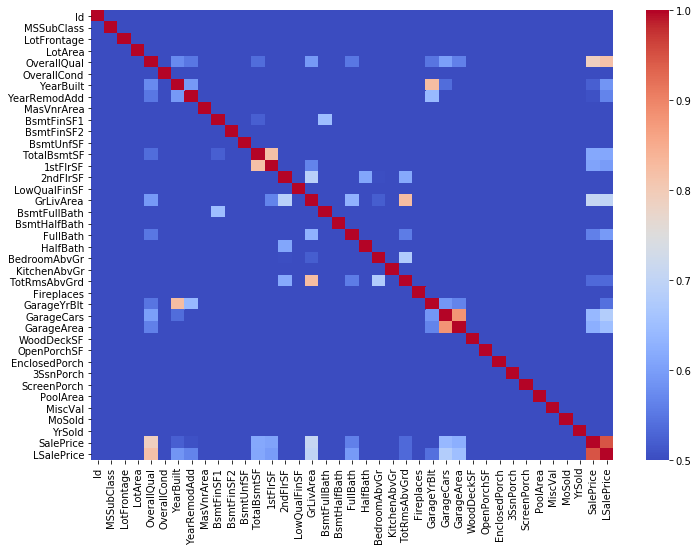

In [281]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

corr = df_train.corr()
ax = sns.heatmap(corr, vmin=0.5, cmap='coolwarm', ax=ax)

Looking at our heatmap, Important factors include OverallQual, LowQualFinSF, GarageCars.

This makes a lot of sense. Overall Quality of material of a house will obviously affect SalePrice significantly along with amount of floor that are low quality in sq feet and size of garage.

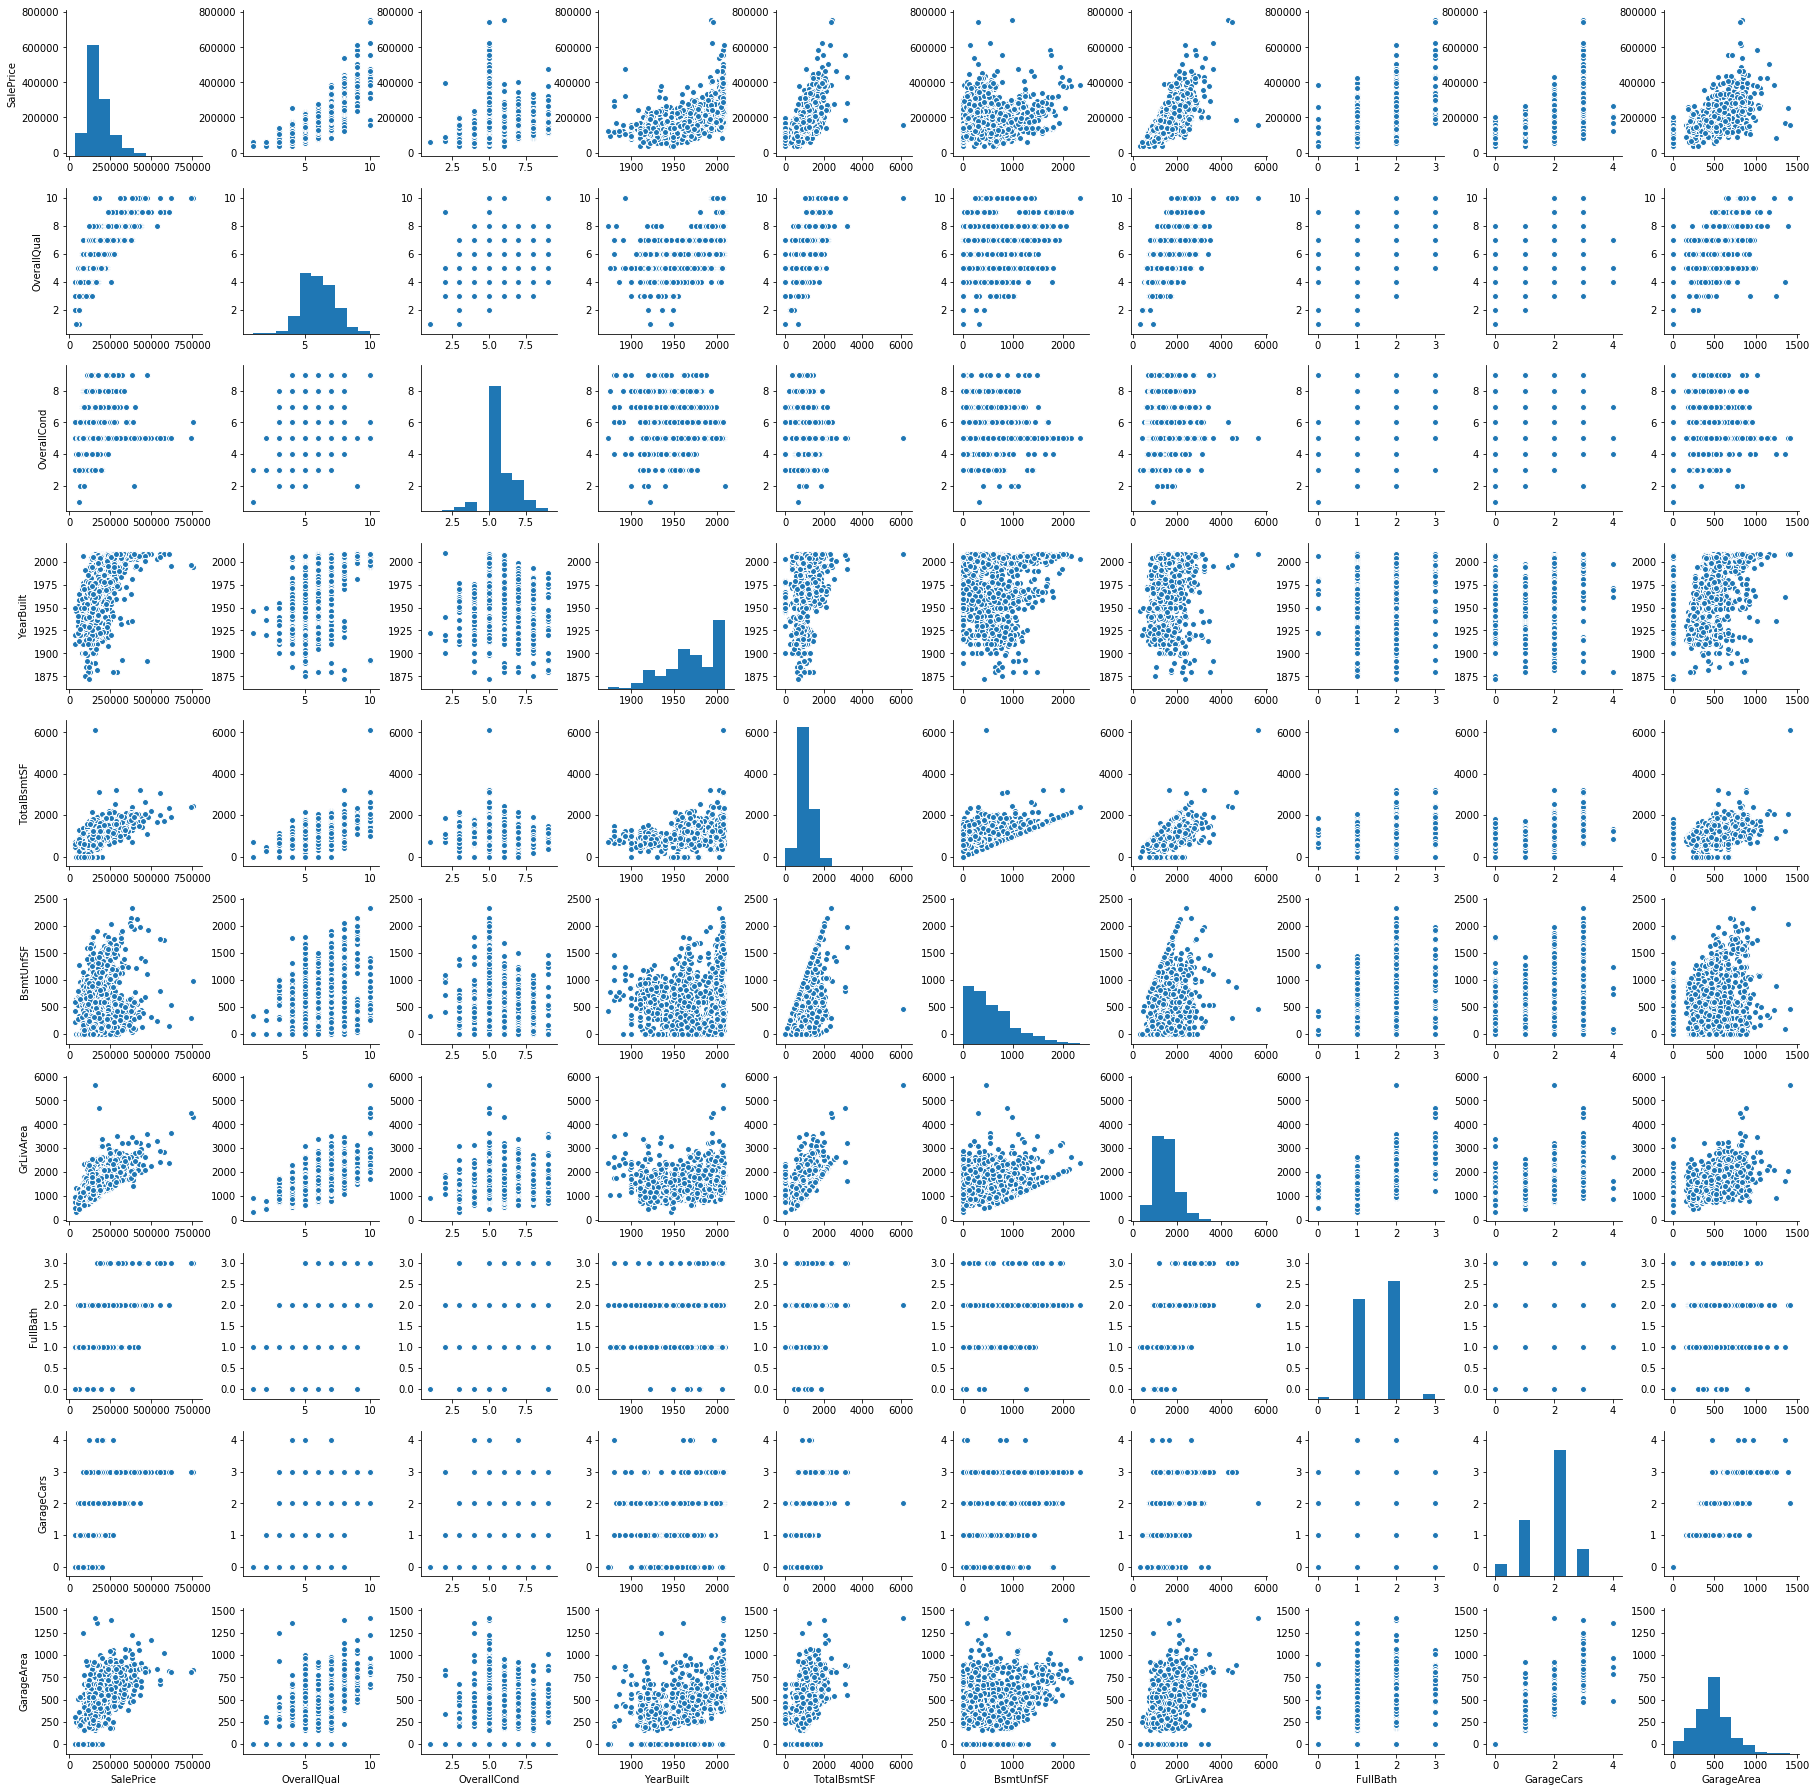

In [282]:
sns.pairplot(df_train[["SalePrice","OverallQual","OverallCond","YearBuilt","TotalBsmtSF","BsmtUnfSF","GrLivArea","FullBath","GarageCars","GarageArea"]])

The scatterplots exhibit some interesting patterns.

1) There seems to be strong linear correlation between Above grade (ground) living area, TotalBsmtSF and Sale Price, except for a couple of outliers.

2) For ordinal variables, OverallQual factors in significantly. Number of Full Bathrooms above grade shows a strong, significant pattern with SalePrice, along with GarageCars, although for GarageCars, the largest size tends to have the lowest SalePrice which is interesting. It could be that the largest garage would be difficult to maintain.

**Imputing Missing Values:**
==

In [283]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [284]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Columns with missing values: <br />
Training set: <br />
[ 'LotFrontage', 'Alley', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'] <br/>

Test set: <br />
['MSZoning', 'LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','KitchenQual','Functional','FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']



In [285]:
len([ 'LotFrontage', 'Alley', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'])

17

In [286]:
len(['MSZoning', 'LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','KitchenQual','Functional','FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond'])

29

There are 17 columns with missing values for training data and 29 columns with missing values for test data!

In [287]:
df_train['MSSubClass'][df_train['LotFrontage'].isnull()].unique()

array([ 60,  20,  85,  80,  50, 120, 160,  30,  75,  90, 190,  70,  40])

Text(0.5,1,'Test set')

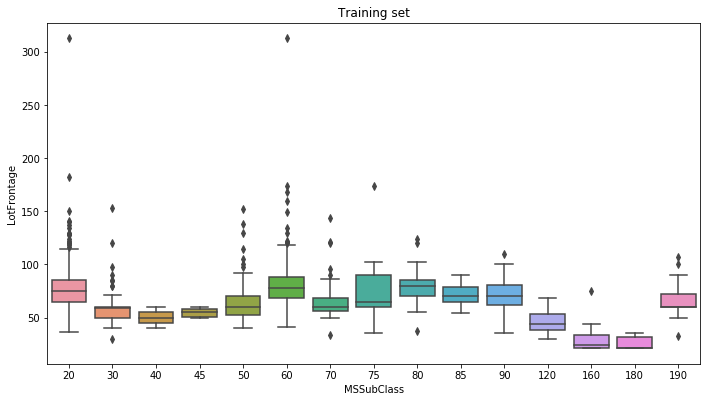

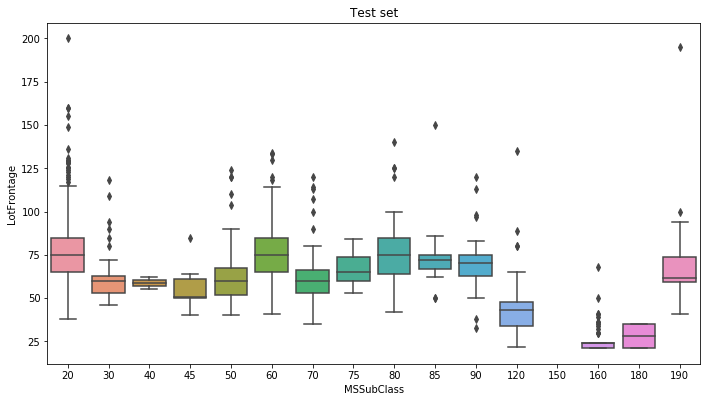

In [288]:
a4_dims = (11.7, 6.27)
fig, ax = plt.subplots(figsize=a4_dims)
fig2, ax2 = plt.subplots(figsize=a4_dims)
sns.boxplot(x="MSSubClass",y="LotFrontage",data=df_train,ax=ax).set_title("Training set")
sns.boxplot(x="MSSubClass",y="LotFrontage",data=df_test,ax=ax2).set_title("Test set")

Intuition: LotFrontage depends on the type of dwelling. Some dwellings will naturally have less access to the street (for more secluded kinds of dwellings).

Examining the boxplot, we can see that, indeed there are variations in LotFrontage among different kinds of dwellings.

Thus, missing values of LotFrontage can be imputed 

In [289]:
for dataset in full_data:
    dataset['LotFrontage'] = dataset.groupby('MSSubClass')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

There is 1 missing value for LotFrontage left and that is for MSSubClass 150. We have little information to impute this value, however, we know it is a PUD.  A reasonable value to impute will be to take average of the medians of the 1-story and 2-story PUDs.

In [290]:
df_test.groupby('MSSubClass')['LotFrontage'].median()

MSSubClass
20     75.0
30     60.0
40     58.5
45     50.5
50     60.0
60     75.0
70     60.0
75     65.0
80     75.0
85     72.0
90     70.0
120    43.0
150     NaN
160    24.0
180    28.0
190    61.5
Name: LotFrontage, dtype: float64

In [291]:
df_test['LotFrontage'][df_test['MSSubClass']==150] = 38

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Lot Frontage ✓


Columns that are categorical in training set and test set that have missing values:
    
['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','MasVnrType']

The missing values could represent an important piece of information hence it would be unwise to simply drop these columns

On account of loss of information should we choose to drop these columns, and to make our life easier, let's create a separate category in each of these columns for the values that are missing.

In [292]:
missin_cats = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','MasVnrType']
df_train.update(df_train[missin_cats].fillna("NA"))
df_test.update(df_test[missin_cats].fillna("NA"))

We are left with Electrical and GarageYrBlt for our training set.

For the test set, we are left with MSZoning, LotFrontage, Utilities, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, BsmtFinSF1,BsmtUnfSF,TotalBsmtSF, BsmtFullBath, BsmtHalfBath, KitchenQual, Functional, GarageYrBlt, GarageCars, GarageArea, SaleType

The reason why some categorical columns aren't imputed above is because they are exclusive on either data sets. Therefore, we need to be careful as imputing on either dataset will create a unforeseen category, for example, if we create a new category in the test dataset, the model trained on the training set may be unusable on the test set.

Impute remaining categorical variables in test set:

In [293]:
df_test[df_test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NA,Reg,Lvl,NaN,...,0,0,NA,NA,NA,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NA,Reg,Low,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Abnorml
790,2251,70,NaN,60.0,56600,Pave,NA,IR1,Low,AllPub,...,0,0,NA,NA,NA,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2006,WD,Normal


We can check if there is a relationship between MSZoning and MSSubClass

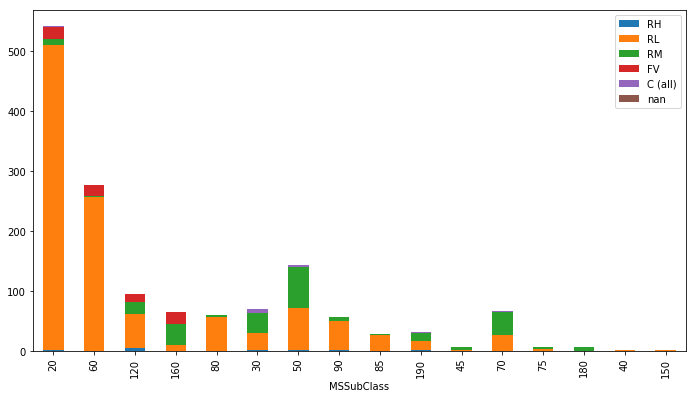

In [294]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

a4_dims = (11.7, 6.27)
fig, ax = plt.subplots(figsize=a4_dims)
aggregate('MSSubClass','MSZoning',df_test).plot(kind='bar',stacked=True, ax=ax)

We can impute 20:1-STORY 1946 & NEWER ALL STYLES with RL, since it is the mode in the category. However, Subclasses 30 and 70 would be trickier.

In [295]:
aggregate('MSSubClass','MSZoning',df_test)

,RH,RL,RM,FV,C (all),nan
MSSubClass,,,,,,
20,1,508,10,21,1,0
60,0,256,2,18,0,0
120,4,58,19,14,0,0
160,0,10,34,21,0,0
80,0,57,3,0,0,0
30,1,28,34,0,6,0
50,1,71,68,0,3,0
90,1,49,7,0,0,0
85,0,27,1,0,0,0


In view of time, we impute house with SubClass 30 & 70 as "RM" since it is the mode.

In [296]:
df_test['MSZoning'][(df_test['MSZoning'].isnull()) & (df_test['MSSubClass']==20) ] = "RL"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [297]:
df_test['MSZoning'][(df_test['MSZoning'].isnull()) & ( (df_test['MSSubClass']==30) | (df_test['MSSubClass']==70) ) ] = "RM"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


For the remaining columns that are categorical in test set, since they are at most missing a couple of values, we can fill them in by the mode of the data.

['Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF' ,'TotalBsmtSF', 'KitchenQual', 'Functional','GarageCars', 'GarageArea', 'SaleType']

In [298]:
for col in ['Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF' ,'TotalBsmtSF', 'KitchenQual', 'Functional','GarageCars', 'GarageArea', 'SaleType','BsmtFullBath','BsmtHalfBath']:
    df_test[col].fillna(df_test[col].mode()[0],inplace=True)

In [299]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [300]:
df_train.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [301]:
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0],inplace=True)

Intuitively, Year that garage is built shouldn't affect SalePrice significantly though we do not know for sure. However, to make life easier, we will drop this column in this analysis.

In [302]:
for data_set in full_data:
    data_set.drop(['GarageYrBlt'], axis=1,inplace=True)

We are left with MasVnrArea to impute for both training and test data.

Text(0.5,1,'Test set')

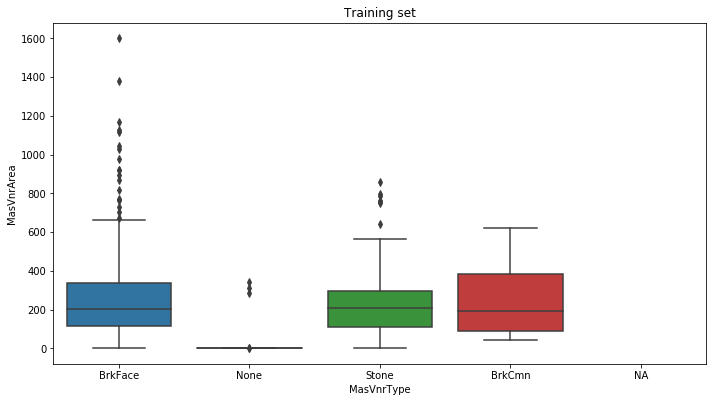

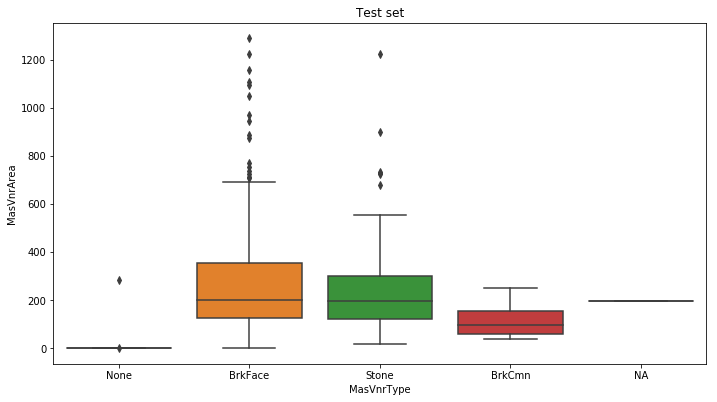

In [303]:
a4_dims = (11.7, 6.27)
fig, ax = plt.subplots(figsize=a4_dims)
fig2, ax2 = plt.subplots(figsize=a4_dims)
sns.boxplot(x="MasVnrType",y="MasVnrArea",data=df_train,ax=ax).set_title("Training set")
sns.boxplot(x="MasVnrType",y="MasVnrArea",data=df_test,ax=ax2).set_title("Test set")

Masonry Veneer Area does not seem seperable by Masonry Veneer Type. Nevertheless, logically, it should depend on the Masonry Veneer Type and there are nuances between different Masonry Types. Given that this is the only logical link that seems present at the moment, we impute by Masonry Veneer Type.

In [304]:
df_train[df_train['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LSalePrice
234,235,60,RL,77.5,7851,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,5,2010,WD,Normal,216500,12.285346
529,530,20,RL,75.0,32668,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,3,2007,WD,Alloca,200624,12.209188
650,651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,5,2008,WD,Normal,205950,12.235389
936,937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,8,2009,WD,Normal,184900,12.127570
973,974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,12,2008,New,Partial,182000,12.111762
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,NA,NA,NA,0,11,2007,New,Partial,199900,12.205573
1243,1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,9,2006,New,Partial,465000,13.049793
1278,1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,3,2008,WD,Normal,237000,12.375815


MasonryType is not reported, we cannot impute for training set. There is no other available option except to impute as 0.

In [305]:
for dataset in full_data:
    dataset['MasVnrArea'] = dataset.groupby('MasVnrType')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

In [306]:
df_train['MasVnrArea'][df_train['MasVnrArea'].isnull()] = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [307]:
sum(df_train.isnull().sum())

0

In [308]:
sum(df_test.isnull().sum())

0

That concludes Imputing of Missing Values. Next, we need to do some Data Wrangling, especially for categorical variables, using techniques such as One-Hot Encoding before we can train our model.

Data Wrangling
==

There are 3 types of variables we have to deal with: categorical, ordinal and date variables.

For categorical, we need to perform one-hot encoding to implement regression.

For ordinal, we need to assign values to each level.

For the purpose of this analysis, to be conservative, we encode ordinal variables (in other words, we will just treat ordinal variables like categorical variables).

For date, we need to either treat it as a categorical variable or drop the column

As a reminder:

__categorical variables__: <br />
  [ 'MSSubClass' , 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
  
  __ordinal variables__: <br />
  [ 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces' , 'FireplaceQu',  'basement', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
  
  __other variables__ (Date, etc..) : <br />
  [' YearBuilt', 'YearRemodAdd',  'MoSold', 'YrSold']
  
  MoSold and YrSold can be treated as categorical variables. We will deal with the rest of the date variables later.

In [309]:
df_train['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [310]:
df_test['MSSubClass'].unique()

array([ 20,  60, 120, 160,  80,  30,  50,  90,  85, 190,  45,  70,  75,
       180,  40, 150])

As you can see from the example aboove, the training and test sets may have different categories within each categorical variable. What we have to do is to merge the 2 data sets temporarily to process the categorical columns and then seperate them out again

In [311]:
df_train['train'] = 1
df_test['train'] = 0

In [312]:
combined_dataset = pd.concat([df_train,df_test])

In [313]:
categories={} # contains all the levels in those feature columns
categorical_feature_names =   [ 'MSSubClass' , 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 
                               'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                               'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 
                               'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 
                               'SaleCondition', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
                               'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                               'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                               'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces' , 
                               'FireplaceQu',  'BsmtQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 
                               'Fence',]

for f in categorical_feature_names:
    # to make sure the type is indeed category
    combined_dataset[f] = combined_dataset[f].astype('category')
    categories[f] = combined_dataset[f].cat.categories

new_combined_dataset = pd.get_dummies(combined_dataset,columns=categorical_feature_names,drop_first=True)


In [314]:
df_newtrain = new_combined_dataset[new_combined_dataset['train'] == 1]
df_newtest = new_combined_dataset[new_combined_dataset['train'] == 0]
df_newtrain.drop(["train"],axis=1,inplace=True)
df_newtest.drop(["train","LSalePrice","SalePrice"],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [315]:
df_newtrain.shape

(1460, 321)

In [316]:
df_newtest.shape

(1459, 319)

**Dealing with dates:**

We can take current year and subtract it by year built. this will give us the age of the house. 
For YearRemodAdd, it will tell us when was the last time the house was remodelled which would indicate information
about the condition of the house.


In [317]:
new_fulldata = [df_newtrain, df_newtest]
for dataset in new_fulldata:
    for col in ['YearBuilt','YearRemodAdd']:
        dataset['HouseAge'] = 2018 - dataset['YearBuilt']
        dataset['RemodAge'] = 2018 - dataset['YearRemodAdd']
        dataset.drop(['YearBuilt','YearRemodAdd'],axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Now, we can finally train models on our data!

In [318]:
lambgrid = np.linspace(0.01, 100, num=1000,endpoint=True)

In [319]:
y_train = df_train['LSalePrice']

In [320]:
train_id = df_newtrain['Id']
test_id = df_newtest['Id']

In [321]:
X_train = df_newtrain.drop(['SalePrice','LSalePrice','Id'],axis=1)

In [322]:
df_newtest.drop(['Id'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [323]:
#Ridge Regression:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=lambgrid, cv=5)

In [324]:
from sklearn.linear_model import Ridge
coefs = []
for a in lambgrid:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

As an illustration, below is a graph of weights against alphas.
The larger alpha is, the bigger the regularization effect and hence, the smaller the coefficients.

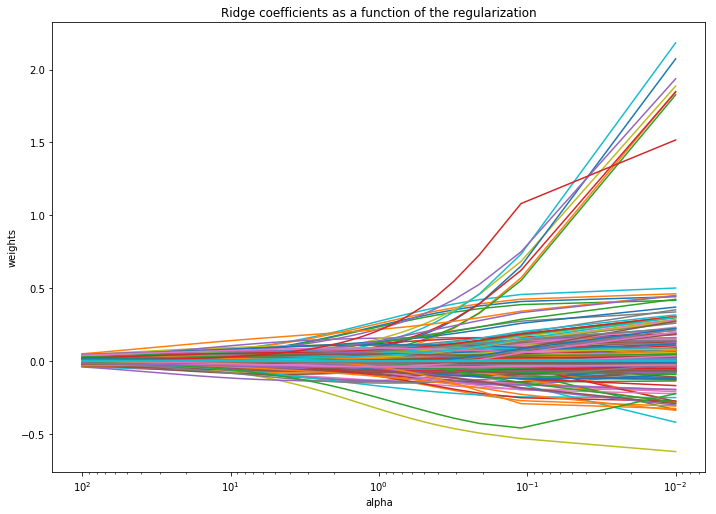

In [325]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.plot(lambgrid, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [326]:
clf.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000e-02, 1.10090e-01, ..., 9.98999e+01, 1.00000e+02]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [327]:
preds_ridge = clf.predict(df_newtest)

In [328]:
np.exp(preds)

array([114509.7012554 , 158686.46187789, 181624.89913896, ...,
       166150.93995595, 115012.65201229, 216189.30476477])

In [329]:
ridge_alpha = clf.alpha_

In [330]:
from sklearn.model_selection import cross_val_score
print('Ridge Regression Cross Validation Score: %s' % (
                      cross_val_score(Ridge(alpha = ridge_alpha), X_train, y_train,scoring='neg_mean_squared_error').mean()))

Ridge Regression Cross Validation Score: -0.020964107676315454


Let's see if we can get a lower CV score with LASSO or  ElasticNet.

In [331]:
#LASSO:
from sklearn.linear_model import LassoCV
lasso_clf = LassoCV(alphas=lambgrid, cv=5)

In [332]:
lasso_clf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([1.00000e-02, 1.10090e-01, ..., 9.98999e+01, 1.00000e+02]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [333]:
preds_lasso = lasso_clf.predict(df_newtest)

In [334]:
lasso_alpha = lasso_clf.alpha_
from sklearn.linear_model import Lasso

print('Lasso Cross Validation Score: %s' % (
                      cross_val_score(Lasso(alpha = lasso_alpha), X_train, y_train,scoring='neg_mean_squared_error').mean()))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso Cross Validation Score: -0.03491409673946914


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso has a larger mean squared error as compared to Ridge. Looks like Ridge Regression is leading!

Introducing ElasticNet:

In [335]:
#ElasticNet:
from sklearn.linear_model import ElasticNetCV
elastic_clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],alphas=lambgrid, cv=5)

In [336]:
elastic_clf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([1.00000e-02, 1.10090e-01, ..., 9.98999e+01, 1.00000e+02]),
       copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [337]:
preds_elastic = elastic_clf.predict(df_newtest)

In [338]:
elastic_alpha = elastic_clf.alpha_
from sklearn.linear_model import ElasticNet

print('ElasticNet Cross Validation Score: %s' % (
                      cross_val_score(ElasticNet(alpha = elastic_alpha), X_train, y_train,scoring='neg_mean_squared_error').mean()))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet Cross Validation Score: -0.03157260998197581


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Looks like Ridge Regression wins, followed by ElasticNet then Lasso.

Can we do even better? How about Gradient Boosted Regression?

In [339]:
import xgboost as xgb
xgtrain = xgb.DMatrix(X_train,label=y_train)
xgb_clf = xgb.XGBRegressor(max_depth = 7,n_estimators=700)
xgb_param = xgb_clf.get_xgb_params()

In [340]:
print('XGB Regression Cross Validation Score: %s' % (
                      cross_val_score(xgb_clf, X_train, y_train,scoring='neg_mean_squared_error').mean()))

XGB Regression Cross Validation Score: -0.0192630264660428


Extreme Gradient Boosting has dethroned Ridge Regression!

In [341]:
xgb_clf.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [342]:
preds_xgb = xgb_clf.predict(df_newtest)

In [344]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': np.exp(preds_xgb)})

In [345]:
submission.to_csv('Submission.csv',index=False)

Update: Turns out Ridge Regression has the lowest test error, even compared to stacking all 4 results or using predicts from XGRegressor. Alright, that's all for this project. Towards the next data science endeavour!